## Imports

In [1]:
! pip uninstall opencv-python -y
! pip uninstall opencv-contrib-python -y
! pip install opencv-python==3.4.11.45
! pip install opencv-contrib-python==3.4.11.45
! pip install tqdm

Uninstalling opencv-python-3.4.11.45:
  Successfully uninstalled opencv-python-3.4.11.45


Exception:
Traceback (most recent call last):
  File "C:\Users\Huma Ameer\Anaconda3\lib\shutil.py", line 395, in _rmtree_unsafe
    os.unlink(fullname)
PermissionError: [WinError 5] Access is denied: 'c:\\users\\huma ameer\\anaconda3\\lib\\site-packages\\~v2\\cv2.cp37-win_amd64.pyd'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Huma Ameer\Anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 179, in main
    status = self.run(options, args)
  File "C:\Users\Huma Ameer\Anaconda3\lib\site-packages\pip\_internal\commands\uninstall.py", line 78, in run
    uninstall_pathset.commit()
  File "C:\Users\Huma Ameer\Anaconda3\lib\site-packages\pip\_internal\req\req_uninstall.py", line 412, in commit
    self._moved_paths.commit()
  File "C:\Users\Huma Ameer\Anaconda3\lib\site-packages\pip\_internal\req\req_uninstall.py", line 263, in commit
    save_dir.cleanup()
  File "C:\Users\Huma Ameer\Anaconda3\lib\s

Uninstalling opencv-contrib-python-3.4.11.45:
  Successfully uninstalled opencv-contrib-python-3.4.11.45
  Using cached https://files.pythonhosted.org/packages/39/22/b0e95a5228535216fd7c5c9e91481abe1c143cfd4fd62fa504148810a280/opencv_python-3.4.11.45-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/94/be/4c9235465aaaf649bd24736af676d216e531884b4678d246df870dcd8b37/opencv_contrib_python-3.4.11.45-cp37-cp37m-win_amd64.whl


In [75]:
import argparse
import cv2
import numpy as np 
import os
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics.pairwise import chi2_kernel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import time
from skimage.feature import hog
from skimage.io import imread
import joblib,glob,os,cv2

from sklearn.svm import LinearSVC
from sklearn import svm, metrics
from sklearn.preprocessing import LabelEncoder
from skimage import feature
from skimage import exposure
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

## Function to compute HOG

In [76]:
#FUNCTION TO COMPUTE HOG
def compute_HOG(image):
    (H1, hogImage1) = feature.hog(image, orientations = 9,
                                pixels_per_cell  = (8, 8), cells_per_block  = (3, 3), transform_sqrt=True,
                                block_norm  = 'L1' , visualize=True)
    return (H1, hogImage1)

## Loading training data

In [77]:
#LOAD THE TRAINING DATA
Categories=['pos','neg']
train_dataX=[] #input array
train_label=[] #output array
datadir='train' 
#path which contains all the categories of images
for i in Categories:
    
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        fd=imread(os.path.join(path,img))
        fd=resize(fd,(64,128))
        
  #append computed HOGs in train data
        train_dataX.append(fd)
        
        train_label.append(Categories.index(i))
        
    print(f'loaded category:{i} successfully')


loading... category : pos


C:\Users\Huma Ameer\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Huma Ameer\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


loaded category:pos successfully
loading... category : neg
loaded category:neg successfully


## Applying HOG on the training data

In [78]:
#APPLY HOG ON TRAINING
train_data=[]
for i in train_label:
  # pre-process image here if needed
  # Computing the HOG features. Also Keep and eye on the parameters used in this function call.
    (h_vector, h_image) = compute_HOG(train_dataX[i])
  #append computed HOGs in train data
    train_data.append(h_vector)
#get train labels


In [80]:
#CHECK IF THE LENGTH IS EQUAL
print('Data Prepared........')
print('Train Data:',len(train_data))
print('Train Labels (1,0)',len(train_label))

Data Prepared........
Train Data: 3634
Train Labels (1,0) 3634


## Training SVM Model

In [81]:
#TRAIN SVM MODEL
from sklearn.svm import LinearSVC

# load linear SVM
modelSVC = LinearSVC(max_iter=3000)
modelSVC.fit(train_data, train_label)
print("SVC training completed")


SVC training completed


## Training Random Forest

In [96]:
#TRAIN RANDDOM FOREST CLASSIFIER
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_data, train_label);

In [82]:
#LOAD TEST DATA
Categories=['pos','neg']
test_dataX=[] #input array

test_label=[] #output array
datadir='test' 
#path which contains all the categories of images
for i in Categories:
    
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        fd=imread(os.path.join(path,img))
        fd=resize(fd,(64,128))
        
  #append computed HOGs in train data
        test_dataX.append(fd)
        
        test_label.append(Categories.index(i))
        
    print(f'loaded category:{i} successfully')


loading... category : pos


C:\Users\Huma Ameer\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Huma Ameer\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


loaded category:pos successfully
loading... category : neg
loaded category:neg successfully


## Computing HOG on Test Data

In [84]:
#APPLY HOG ON TEST DATA
test_data=[]
for i in test_label:
  # pre-process image here if needed
  # Computing the HOG features. Also Keep and eye on the parameters used in this function call.
    (h_vector, h_image) = compute_HOG(test_dataX[i])
  #append computed HOGs in train data
    test_data.append(h_vector)
#get train labels


## Testing Models

In [97]:
#TEST THE MODELS

# Create predictions(SVM)
predicted_labels = modelSVC.predict(test_data)
print("Prediction completed")
# Create predictions(RANDOM FOREST)
predicted_labelsRF = rf.predict(test_data)
print("PredictionRF completed")

Prediction completed
PredictionRF completed


## Classification report

In [1]:
#CLASSIFICATION FOR MODELS
from sklearn.metrics import classification_report
print(classification_report(test_label, predicted_labels))
print(classification_report(test_label, predicted_labelsRF))

NameError: name 'test_label' is not defined

Actual Label =
0
Predicted Label =
1


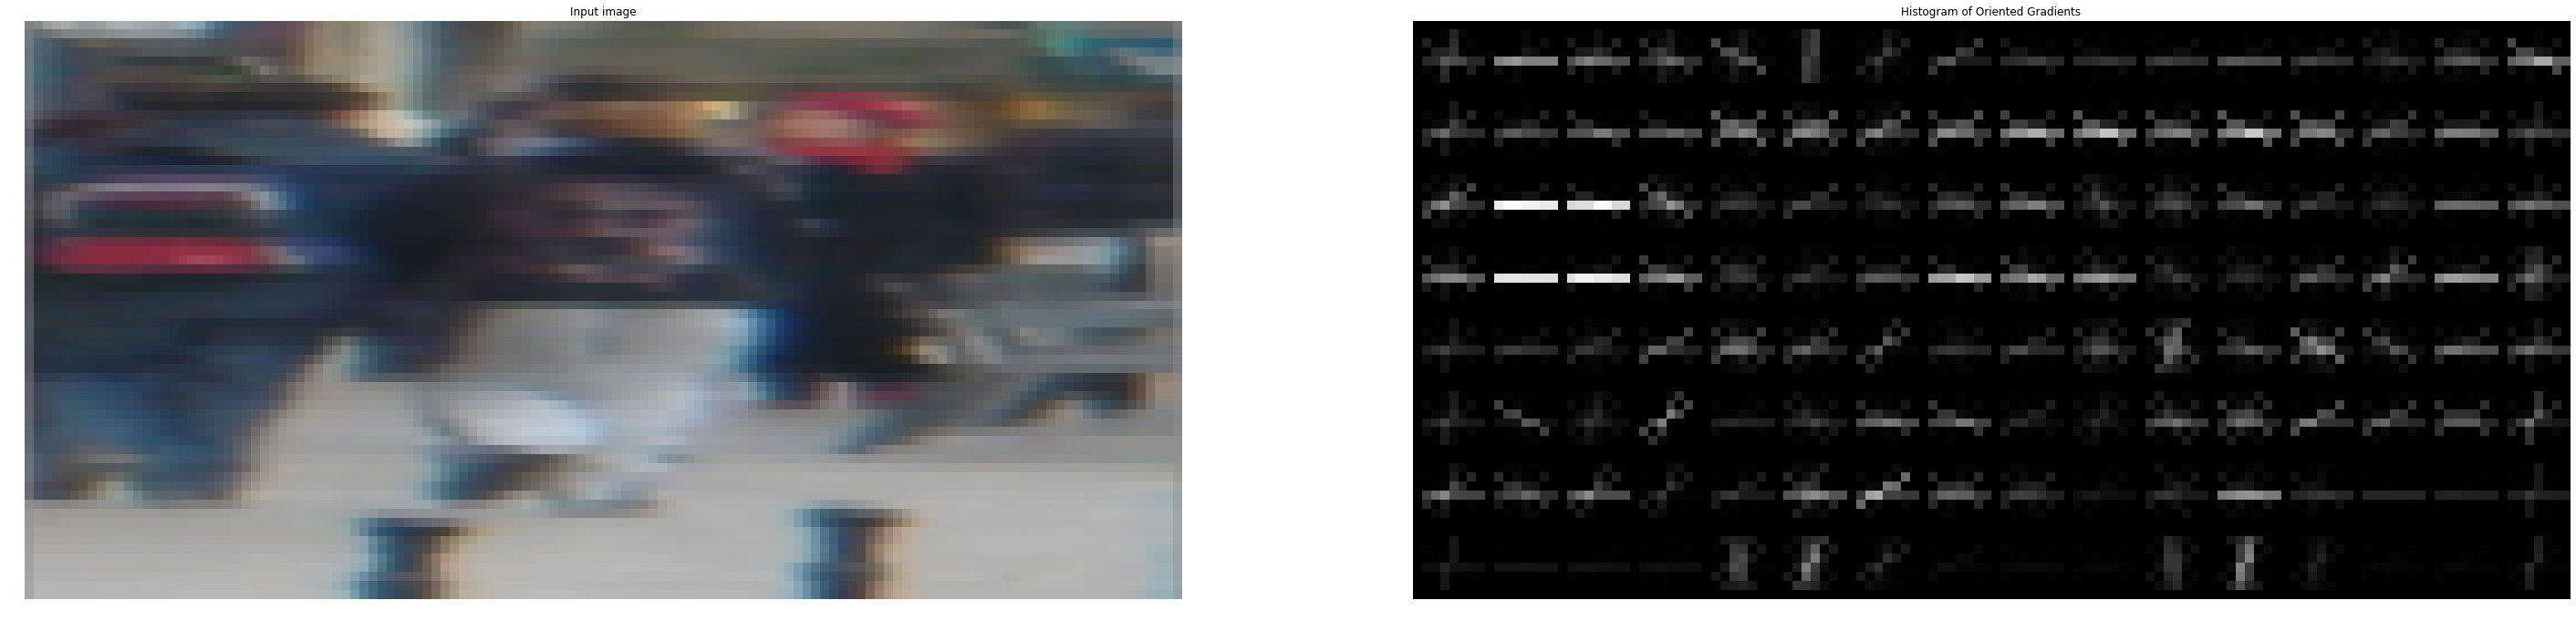

In [105]:
#VISUALIZATION 
index = 40
#get image
image = test_dataX[index]

#compute hog feature vector for above image
(h_vector, h_image) = compute_HOG(image)
obtained_label = modelSVC.predict([h_vector])

#comparison
print("Actual Label =")
print(test_label[index])
print("Predicted Label =")
print(obtained_label[0])

#visualize
figr, (ax1, ax2) = plt.subplots(1, 2, figsize=(50, 50), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(image, cmap="gray")
ax1.set_title('Input image')
ax2.axis('off')
ax2.imshow(h_image,cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

Actual Label =
0
Predicted Label =
0


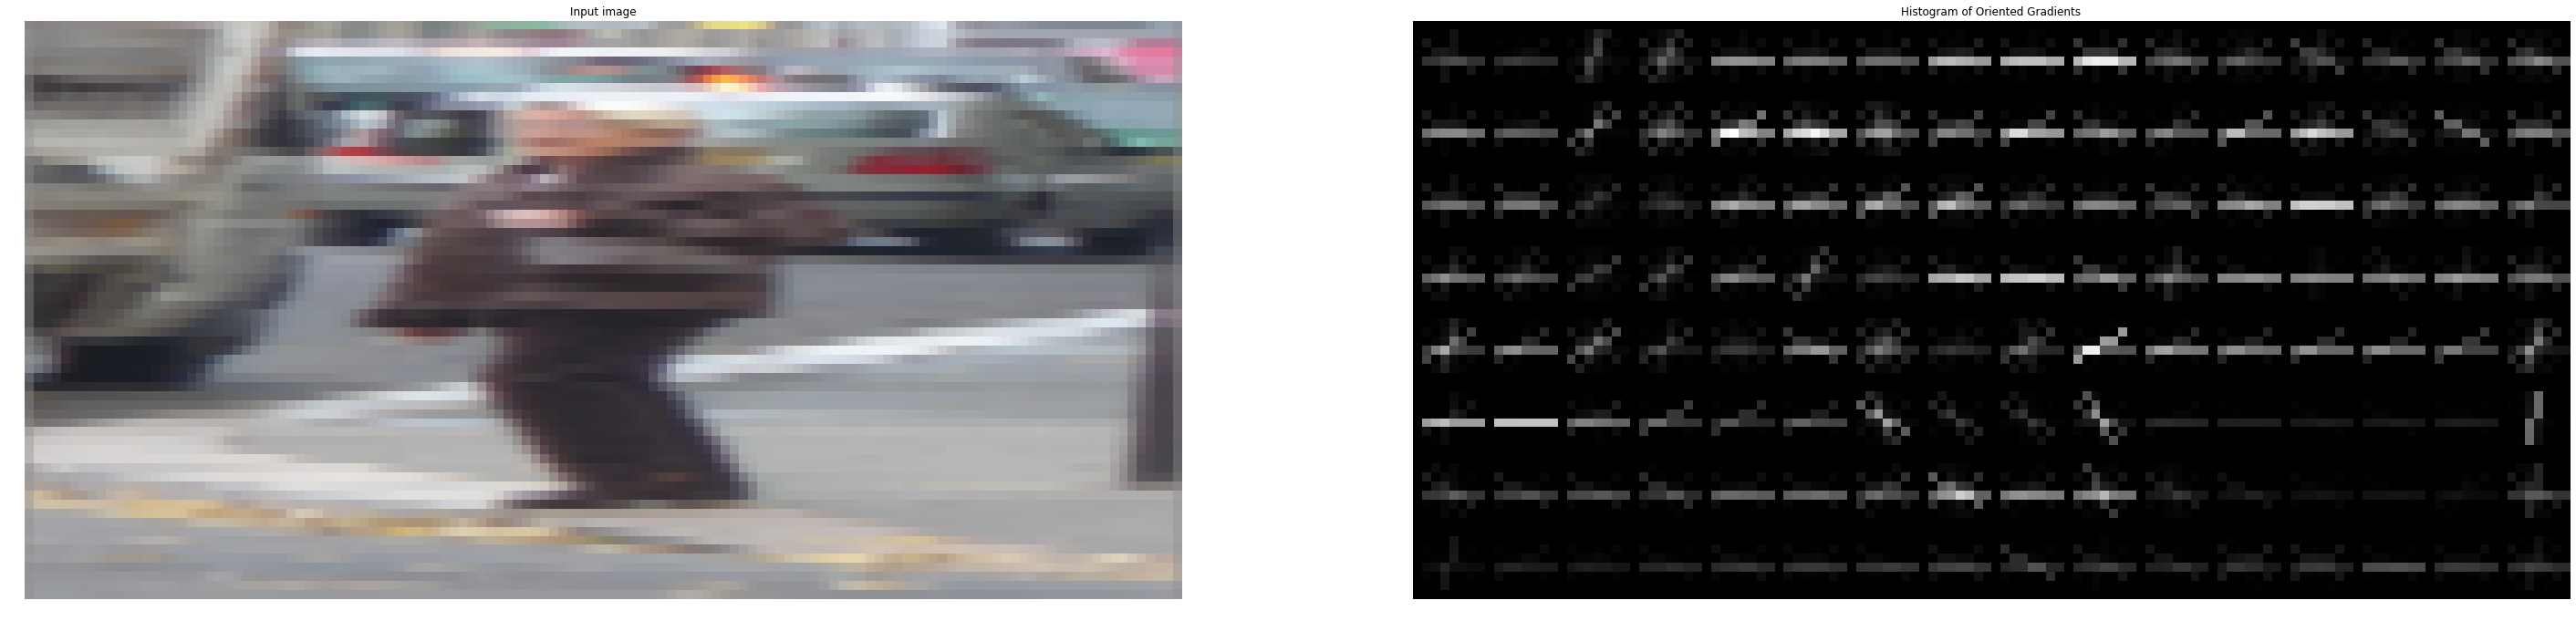

In [104]:
index = 12
#get image
image = test_dataX[index]

#compute hog feature vector for above image
(h_vector, h_image) = compute_HOG(image)
obtained_label = modelSVC.predict([h_vector])

#comparison
print("Actual Label =")
print(test_label[index])
print("Predicted Label =")
print(obtained_label[0])

#visualize
figr, (ax1, ax2) = plt.subplots(1, 2, figsize=(50, 50), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(image, cmap="gray")
ax1.set_title('Input image')
ax2.axis('off')
ax2.imshow(h_image,cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

###### References:
           https://github.com/RashadGarayev/PersonDetection/blob/master/training_SVM.py
           https://debuggercafe.com/image-recognition-using-histogram-of-oriented-gradients-hog-descriptor/
           https://github.com/visionatseecs/opencv-starter/blob/main/07.ipynb
           https://medium.com/analytics-vidhya/image-classification-using-machine-learning-support-vector-machine-svm-dc7a0ec92e01